# **Portfolio Analysis**

## Import Libraries and Dependencies

In [1]:
#Import your libraries and dependencies
import os
import requests
import pandas as pd
import alpaca_trade_api as tradeapi
import numpy as np
from dotenv import load_dotenv

%matplotlib inline

In [2]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Import Data

In [3]:
total_portfolio = pd.read_csv('../Resources/Stock_Portfolio_Prices.csv', index_col = 'Date', parse_dates = True, infer_datetime_format = True)

total_portfolio.head(10)

AAPL          FB       NVDA       PYPL       SHOP     SQ  \
Date                                                                        
2016-01-04  24.323219  102.220001  31.661398  34.750000  25.719999  12.16   
2016-01-05  23.713696  102.730003  32.170021  34.310001  25.309999  11.51   
2016-01-06  23.249626  102.970001  30.839788  33.980000  25.299999  11.52   
2016-01-07  22.268383   97.919998  29.617151  33.130001  24.670000  11.16   
2016-01-08  22.386133   97.330002  28.981380  32.689999  24.930000  11.31   
2016-01-11  22.748621   97.510002  29.030289  33.040001  23.870001  11.84   
2016-01-12  23.078775   99.370003  29.519341  33.080002  23.740000  12.09   
2016-01-13  22.485413   95.440002  28.619478  32.119999  21.379999  11.61   
2016-01-14  22.977186   98.370003  28.042391  32.869999  20.639999  10.82   
2016-01-15  22.425385   94.970001  26.516548  32.310001  19.889999  10.27   

                 TDOC       TSLA       TWTR          Z  
Date                                                    
2016-01-04  17.990000  44.681999  22.559999  22.110001  
2016-01-05  19.500000  44.686001  21.920000  21.990000  
2016-01-06  20.660000  43.807999  21.389999  21.959999  
2016-01-07  20.180000  43.130001  20.260000  21.500000  
2016-01-08  19.170000  42.200001  19.980000  22.100000  
2016-01-11  19.000000  41.570000  19.650000  22.160000  
2016-01-12  18.629999  41.993999  19.620001  22.340000  
2016-01-13  16.910000  40.062000  18.680000  21.450001  
2016-01-14  17.730000  41.236000  19.000000  20.770000  
2016-01-15  17.020000  40.998001  17.940001  20.830000

## Plot Closing Prices

<AxesSubplot:title={'center':'Stock Portfolio Closing Prices: 2016 - Present'}, xlabel='Date', ylabel='Price'>

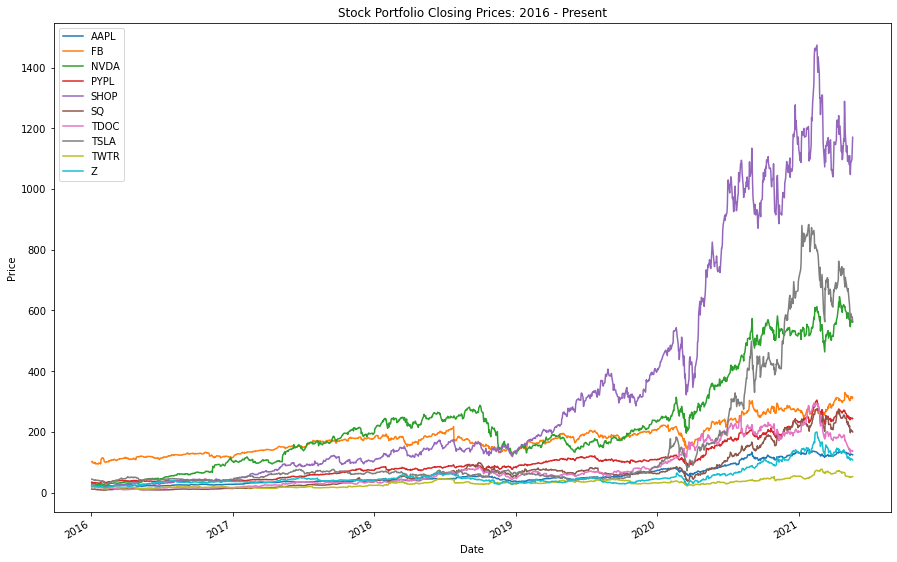

In [4]:
total_portfolio.plot(title = 'Stock Portfolio Closing Prices: 2016 - Present', figsize = (15,10), ylabel = 'Price')

## Calculate Daily Returns

In [5]:
daily_returns = total_portfolio.pct_change().dropna()

daily_returns.head(10)

AAPL        FB      NVDA      PYPL      SHOP        SQ  \
Date                                                                     
2016-01-05 -0.025059  0.004989  0.016064 -0.012662 -0.015941 -0.053454   
2016-01-06 -0.019570  0.002336 -0.041350 -0.009618 -0.000395  0.000869   
2016-01-07 -0.042205 -0.049043 -0.039645 -0.025015 -0.024901 -0.031250   
2016-01-08  0.005288 -0.006025 -0.021466 -0.013281  0.010539  0.013441   
2016-01-11  0.016193  0.001849  0.001688  0.010707 -0.042519  0.046861   
2016-01-12  0.014513  0.019075  0.016846  0.001211 -0.005446  0.021115   
2016-01-13 -0.025710 -0.039549 -0.030484 -0.029021 -0.099410 -0.039702   
2016-01-14  0.021871  0.030700 -0.020164  0.023350 -0.034612 -0.068045   
2016-01-15 -0.024015 -0.034563 -0.054412 -0.017037 -0.036337 -0.050832   
2016-01-19 -0.004839  0.003054  0.008115 -0.003405  0.020613 -0.077897   

                TDOC      TSLA      TWTR         Z  
Date                                                
2016-01-05  0.083936  0.000090 -0.028369 -0.005427  
2016-01-06  0.059487 -0.019648 -0.024179 -0.001364  
2016-01-07 -0.023233 -0.015477 -0.052828 -0.020947  
2016-01-08 -0.050050 -0.021563 -0.013820  0.027907  
2016-01-11 -0.008868 -0.014929 -0.016517  0.002715  
2016-01-12 -0.019474  0.010200 -0.001527  0.008123  
2016-01-13 -0.092324 -0.046007 -0.047910 -0.039839  
2016-01-14  0.048492  0.029305  0.017131 -0.031702  
2016-01-15 -0.040045 -0.005772 -0.055789  0.002889  
2016-01-19 -0.022914 -0.001317 -0.069677 -0.007681

In [6]:
daily_returns.tail()

AAPL        FB      NVDA      PYPL      SHOP        SQ  \
Date                                                                     
2021-05-13  0.017920  0.008957 -0.006778  0.003710 -0.033333 -0.046161   
2021-05-14  0.019845  0.034987  0.042279  0.022799  0.035542  0.054380   
2021-05-17 -0.009259 -0.001519 -0.005441 -0.007836  0.010488 -0.023719   
2021-05-18 -0.011246 -0.017435 -0.010571 -0.004706  0.033720  0.001183   
2021-05-19 -0.001282  0.011711  0.003567  0.005839  0.032673 -0.015013   

                TDOC      TSLA      TWTR         Z  
Date                                                
2021-05-13 -0.052613 -0.030853 -0.011637 -0.014901  
2021-05-14  0.052520  0.031573  0.032329  0.044631  
2021-05-17 -0.016609 -0.021891  0.016818 -0.015284  
2021-05-18  0.014779  0.001803  0.011217 -0.003540  
2021-05-19 -0.017792 -0.024936 -0.005076 -0.016214

## Plot Daily Returns

<AxesSubplot:title={'center':'Portfolio Daily Returns: 2016 - Present'}, xlabel='Date', ylabel='Return'>

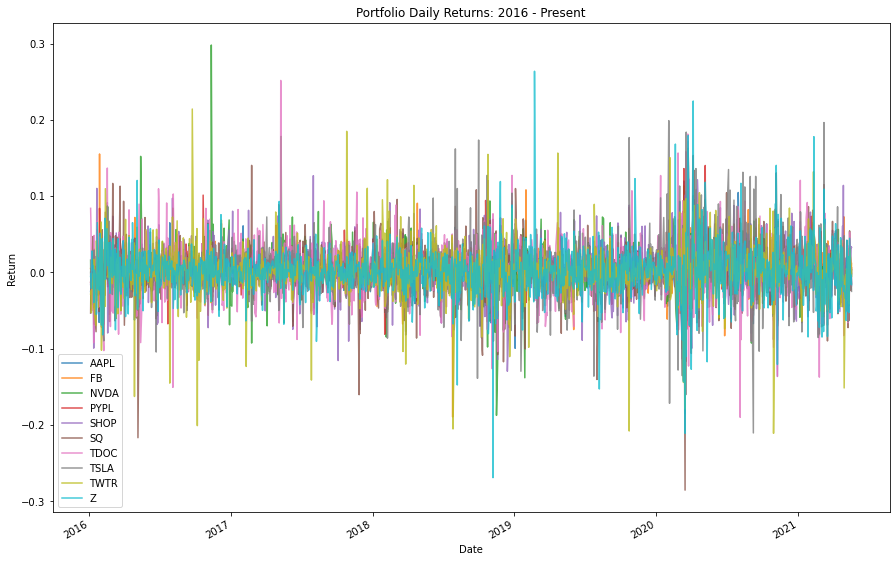

In [7]:
daily_returns.plot(figsize = (15,10), alpha = 0.8, title = 'Portfolio Daily Returns: 2016 - Present', ylabel = 'Return')

## Calculate Cumulative Returns

In [8]:
cumulative_returns = (1 + daily_returns).cumprod()

cumulative_returns

AAPL        FB       NVDA      PYPL       SHOP         SQ  \
Date                                                                        
2016-01-05  0.974941  1.004989   1.016064  0.987338   0.984059   0.946546   
2016-01-06  0.955861  1.007337   0.974050  0.977842   0.983670   0.947368   
2016-01-07  0.915520  0.957934   0.935434  0.953381   0.959176   0.917763   
2016-01-08  0.920361  0.952162   0.915354  0.940719   0.969285   0.930099   
2016-01-11  0.935264  0.953923   0.916899  0.950791   0.928072   0.973684   
...              ...       ...        ...       ...        ...        ...   
2021-05-13  5.137889  2.986304  17.264240  6.929496  40.737560  16.211349   
2021-05-14  5.239849  3.090785  17.994151  7.087482  42.185460  17.092928   
2021-05-17  5.191336  3.086089  17.896241  7.031942  42.627918  16.687500   
2021-05-18  5.132955  3.032283  17.707052  6.998849  44.065319  16.707237   
2021-05-19  5.126377  3.067795  17.770220  7.039712  45.505056  16.456415   

                TDOC       TSLA      TWTR         Z  
Date                                                 
2016-01-05  1.083936   1.000090  0.971631  0.994573  
2016-01-06  1.148416   0.980440  0.948138  0.993216  
2016-01-07  1.121734   0.965266  0.898050  0.972411  
2016-01-08  1.065592   0.944452  0.885638  0.999548  
2016-01-11  1.056142   0.930352  0.871011  1.002261  
...              ...        ...       ...       ...  
2021-05-13  7.376877  12.794638  2.221188  4.843962  
2021-05-14  7.764313  13.198603  2.292996  5.060154  
2021-05-17  7.635353  12.909673  2.331560  4.982813  
2021-05-18  7.748194  12.932949  2.357713  4.965174  
2021-05-19  7.610339  12.610448  2.345745  4.884667  

[1353 rows x 10 columns]

## Plot Cumulative Returns

<AxesSubplot:title={'center':'Cumulative Portfolio Returns: 2020 - Present'}, xlabel='Date', ylabel='Return'>

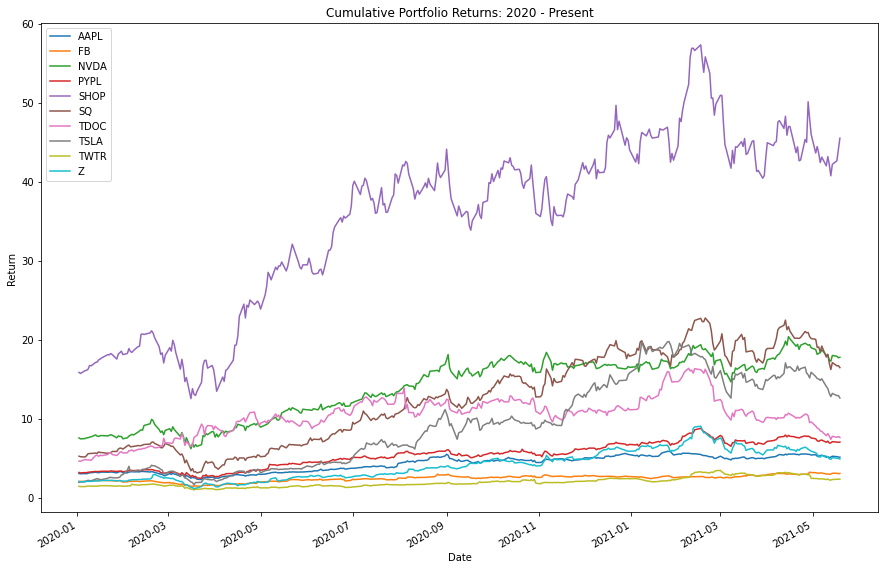

In [9]:
cumulative_returns.loc['2020':].plot(title = 'Cumulative Portfolio Returns: 2020 - Present', figsize = (15,10), ylabel = 'Return')

<AxesSubplot:title={'center':'Cumulative Portfolio Returns: 2016 - Present'}, xlabel='Date', ylabel='Return'>

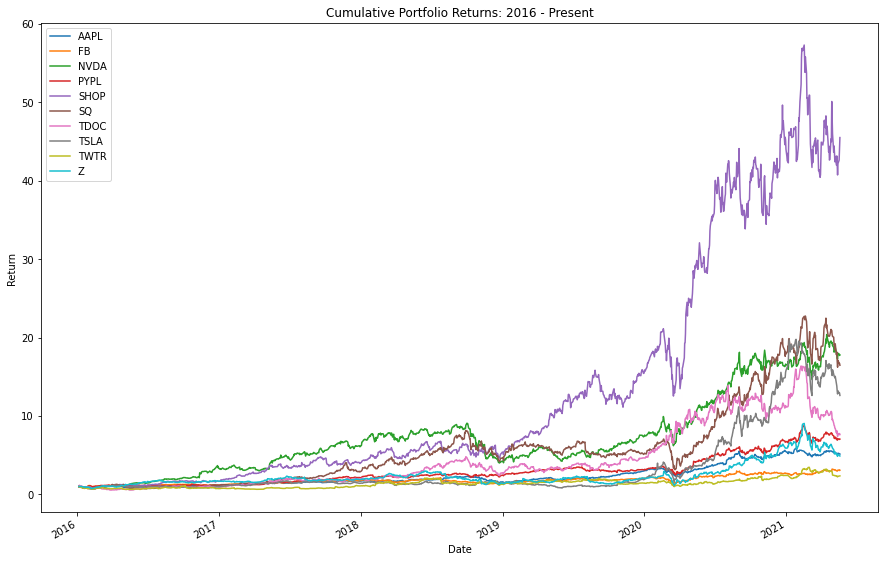

In [10]:
cumulative_returns.plot(title = 'Cumulative Portfolio Returns: 2016 - Present', figsize = (15,10), ylabel = 'Return')

## Calculate 20, 50 & 100 Day Moving Averages

In [16]:
# Calculate 20-day Simple Moving Average for Portfolio Closing Prices
total_portfolio_20dma = total_portfolio.rolling(window=20).mean()

# Calculate 50-day Simple Moving Average for Portfolio Closing Prices
total_portfolio_50dma = total_portfolio.rolling(window=50).mean()

# Calculate 100-day Simple Moving Average for Portfolio Closing Prices
total_portfolio_100dma = total_portfolio.rolling(window=100).mean()

<AxesSubplot:title={'center':'Stock Portfolio 20-Day Moving Averages: 2016 - Present'}, xlabel='Date', ylabel='Price'>

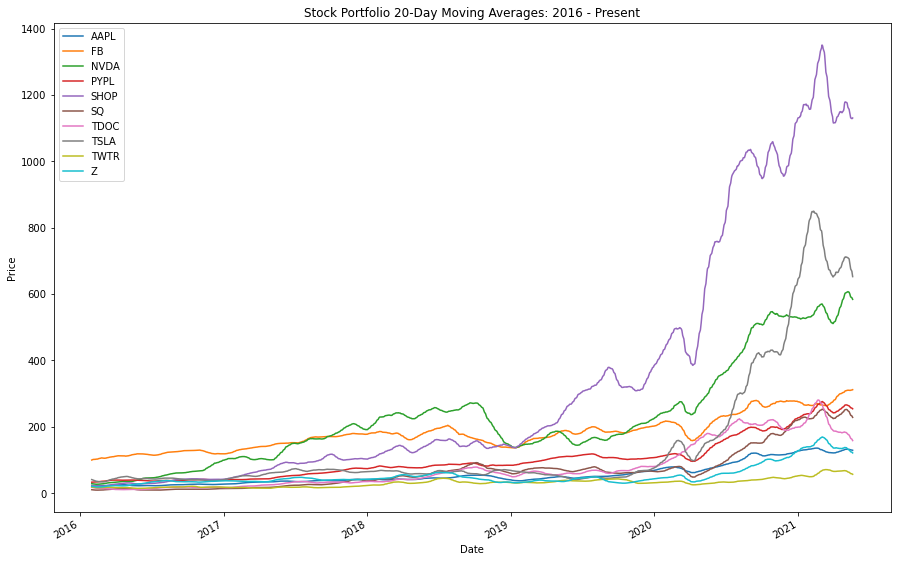

In [18]:
# Plot 20-day Simple Moving Average
total_portfolio_20dma.plot(figsize=(15,10), title = 'Stock Portfolio 20-Day Moving Averages: 2016 - Present', ylabel = 'Price')

<AxesSubplot:title={'center':'Stock Portfolio 50-Day Moving Averages: 2016 - Present'}, xlabel='Date', ylabel='Price'>

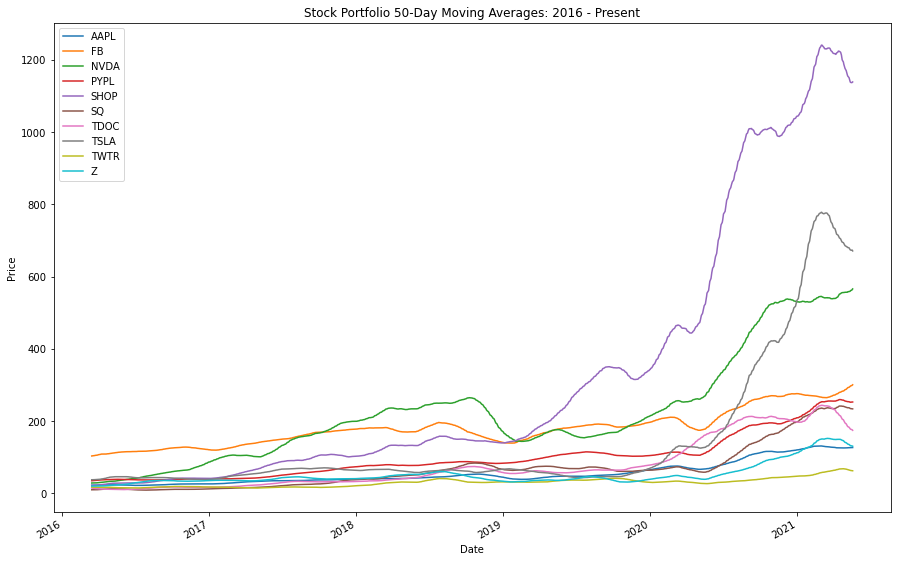

In [19]:
# Plot 50-day Simple Moving Average
total_portfolio_50dma.plot(figsize=(15,10), title = 'Stock Portfolio 50-Day Moving Averages: 2016 - Present', ylabel = 'Price')

<AxesSubplot:title={'center':'Stock Portfolio 100-Day Moving Averages: 2016 - Present'}, xlabel='Date', ylabel='Price'>

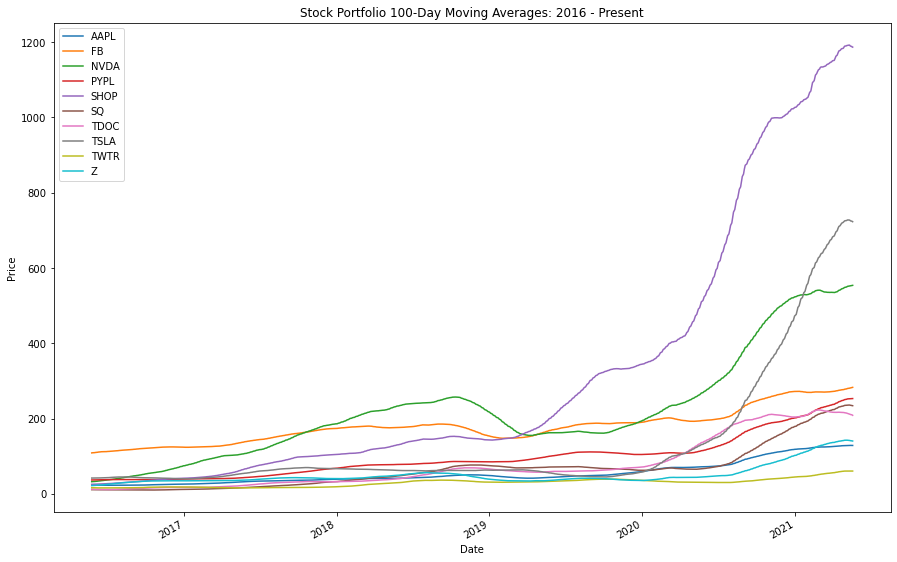

In [20]:
# Plot 100-day Simple Moving Average
total_portfolio_100dma.plot(figsize=(15,10), title = 'Stock Portfolio 100-Day Moving Averages: 2016 - Present', ylabel = 'Price')

## Calculate 20 & 50 Day Moving Averages from 2020 to the Present

In [21]:
# Calculate 20-day Simple Moving Average for Portfolio Closing Prices from 2020 to the Present
total_portfolio_20dma_sample = total_portfolio.loc['2020':].rolling(window=20).mean()

# Calculate 50-day Simple Moving Average for Portfolio Closing Prices from 2020 to the Present
total_portfolio_50dma_sample = total_portfolio.loc['2020':].rolling(window=50).mean()

<AxesSubplot:title={'center':'Stock Portfolio 20-Day Moving Averages: 2020 - Present'}, xlabel='Date', ylabel='Price'>

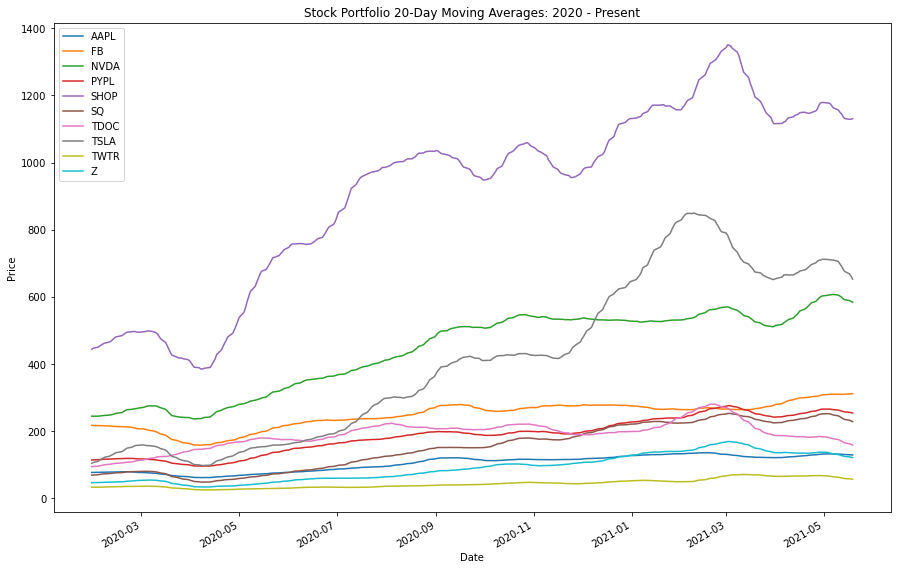

In [22]:
# Plot 20-day Simple Moving Average from 2020 to the Present
total_portfolio_20dma_sample.plot(figsize=(15,10), title = 'Stock Portfolio 20-Day Moving Averages: 2020 - Present', ylabel = 'Price')

<AxesSubplot:title={'center':'Stock Portfolio 50-Day Moving Averages: 2020 - Present'}, xlabel='Date', ylabel='Price'>

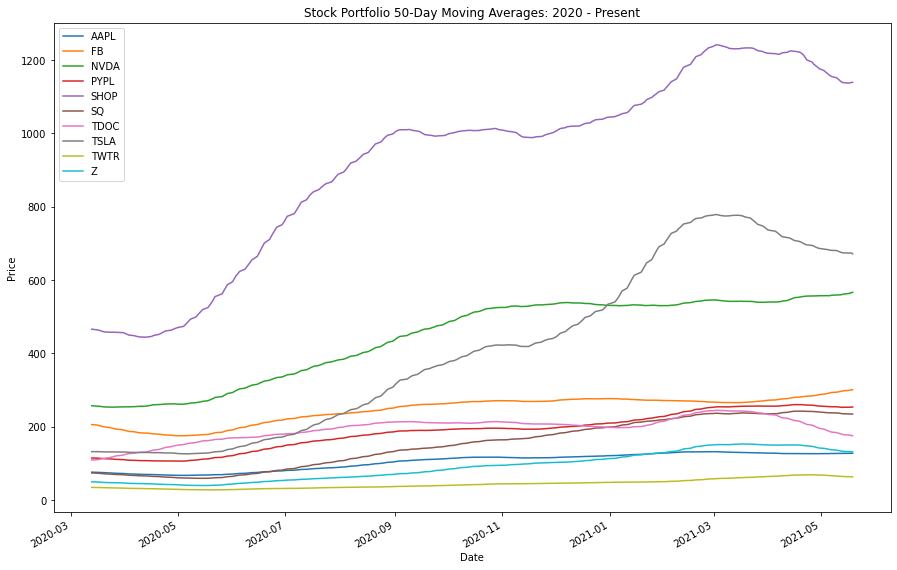

In [23]:
# Plot 50-day Simple Moving Average from 2020 to the Present
total_portfolio_50dma_sample.plot(figsize=(15,10), title = 'Stock Portfolio 50-Day Moving Averages: 2020 - Present', ylabel = 'Price')